In [43]:
#Import pandas so we can import our large cleaned data set, then we need to import the cleaned churn file provided to us by this course
#Jupyter Lab 3.44, Python 3
import pandas as pd
churn_df = pd.read_csv(r'C:\Users\seans\Documents\WGU\D208\churn_clean.csv')

#Import Other Packages, these packages allow us to perform statistical analysis and plot visuals for our data set
import numpy as np
import scipy as sp
import scipy.stats as stats
import pylab
from statsmodels.formula.api import ols
import statistics
import matplotlib as mpl
import matplotlib.pyplot as mpl
import seaborn as sb
# Scikit
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [44]:
#Let's view the dataset
#View Data Types
print(churn_df.select_dtypes(include="float").info())
print(churn_df.select_dtypes(include="integer").info())
print(churn_df.select_dtypes(include="object").info())

#View exaample of the information in the dataset
print (churn_df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Income              10000 non-null  float64
 3   Outage_sec_perweek  10000 non-null  float64
 4   Tenure              10000 non-null  float64
 5   MonthlyCharge       10000 non-null  float64
 6   Bandwidth_GB_Year   10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CaseOrder             10000 non-null  int64
 1   Zip                   10000 non-null  int64
 2   Population            10000 non-null  int64
 3   Children              10000 non-null  int64
 4 

In [45]:
#Rename the header for items 1-8 to show a better description according to the data dictionary because the eight survey items were not labeled properly and need to fixed
churn_df.rename(columns = 
{'Item1':'item1_responses',
'Item2':'item2_fixes',
'Item3':'item3_replacements',
'Item4':'item4_reliability',
'Item5':'item5_options',
'Item6':'item6_respectfulness',
'Item7':'item7_courteous',
'Item8':'item8_listening'},
inplace=True)

In [46]:
#Check for any missing values
churn_df.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [47]:
#Replace categorical values to numeric values
churn_df['Churn_numeric'] = churn_df['Churn']
dict_Churn = {"Churn_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Churn, inplace=True)

churn_df['Area_numeric'] = churn_df['Area']
dict_Area = {"Area_numeric": {"Urban": 0, "Suburban": 1, "Rural": 2}}
churn_df.replace(dict_Area, inplace=True)

churn_df['Marital_numeric'] = churn_df['Marital']
dict_Marital = {"Marital_numeric": {"Widowed": 0, "Married": 1, "Separated": 2, "Never Married": 3, "Divorced": 4}}
churn_df.replace(dict_Marital, inplace=True)

churn_df['Gender_numeric'] = churn_df['Gender']
dict_Gender = {"Gender_numeric": {"Male": 0, "Female": 1, "Prefer not to answer": 2, "Nonbinary": 3}}
churn_df.replace(dict_Gender, inplace=True)

churn_df['Contract_numeric'] = churn_df['Contract']
dict_Contract = {"Contract_numeric": {"One year": 0, "Month-to-month": 1, "Two Year": 2}}
churn_df.replace(dict_Contract, inplace=True)

churn_df['PaymentMethod_numeric'] = churn_df['PaymentMethod']
dict_PaymentMethod = {"PaymentMethod_numeric": {"Credit Card (automatic)": 0, "Bank Transfer(automatic)": 1, "Mailed Check": 2, "Electronic Check": 3}}
churn_df.replace(dict_PaymentMethod, inplace=True)

churn_df['InternetService_numeric'] = churn_df['InternetService']
dict_InternetService = {"InternetService_numeric": {"Fiber Optic": 0, "DSL": 1, "None": 2}}
churn_df.replace(dict_InternetService, inplace=True)

churn_df['Techie_numeric'] = churn_df['Techie']
dict_Techie = {"Techie_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Techie, inplace=True)

churn_df['Port_modem_numeric'] = churn_df['Port_modem']
dict_Port_modem = {"Port_modem_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Port_modem, inplace=True)

churn_df['Tablet_numeric'] = churn_df['Tablet']
dict_Tablet = {"Tablet_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Tablet, inplace=True)

churn_df['Phone_numeric'] = churn_df['Phone']
dict_Phone = {"Phone_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Phone, inplace=True)

churn_df['Multiple_numeric'] = churn_df['Multiple']
dict_Multiple = {"Multiple_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Multiple, inplace=True)

churn_df['OnlineSecurity_numeric'] = churn_df['OnlineSecurity']
dict_OnlineSecurity = {"OnlineSecurity_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_OnlineSecurity, inplace=True)

churn_df['OnlineBackup_numeric'] = churn_df['OnlineBackup']
dict_OnlineBackup = {"OnlineBackup_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_OnlineBackup, inplace=True)

churn_df['DeviceProtection_numeric'] = churn_df['DeviceProtection']
dict_DeviceProtection = {"DeviceProtection_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_DeviceProtection, inplace=True)

churn_df['TechSupport_numeric'] = churn_df['TechSupport']
dict_TechSupport = {"TechSupport_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_TechSupport, inplace=True)

churn_df['StreamingTV_numeric'] = churn_df['StreamingTV']
dict_StreamingTV = {"StreamingTV_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_StreamingTV, inplace=True)

churn_df['Churn_numeric'] = churn_df['Churn']
dict_Churn = {"Churn_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_Churn, inplace=True)

churn_df['StreamingMovies_numeric'] = churn_df['StreamingMovies']
dict_StreamingMovies = {"StreamingMovies_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_StreamingMovies, inplace=True)

churn_df['PaperlessBilling_numeric'] = churn_df['PaperlessBilling']
dict_PaperlessBilling = {"PaperlessBilling_numeric": {"Yes": 0, "No": 1}}
churn_df.replace(dict_PaperlessBilling, inplace=True)

In [48]:
#Mean Values in the Distribution
print (churn_df.mean())
#Median Values in the Distribution)
print (churn_df.median())

CaseOrder                    5000.500000
Zip                         49153.319600
Lat                            38.757567
Lng                           -90.782536
Population                   9756.562400
Children                        2.087700
Age                            53.078400
Income                      39806.926771
Outage_sec_perweek             10.001848
Email                          12.016000
Contacts                        0.994200
Yearly_equip_failure            0.398000
Tenure                         34.526188
MonthlyCharge                 172.624816
Bandwidth_GB_Year            3392.341550
item1_responses                 3.490800
item2_fixes                     3.505100
item3_replacements              3.487000
item4_reliability               3.497500
item5_options                   3.492900
item6_respectfulness            3.497300
item7_courteous                 3.509500
item8_listening                 3.495600
Churn_numeric                   0.735000
Area_numeric    

C:\Users\seans\AppData\Local\Temp\ipykernel_29928\2705325109.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (churn_df.mean())
C:\Users\seans\AppData\Local\Temp\ipykernel_29928\2705325109.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (churn_df.median())


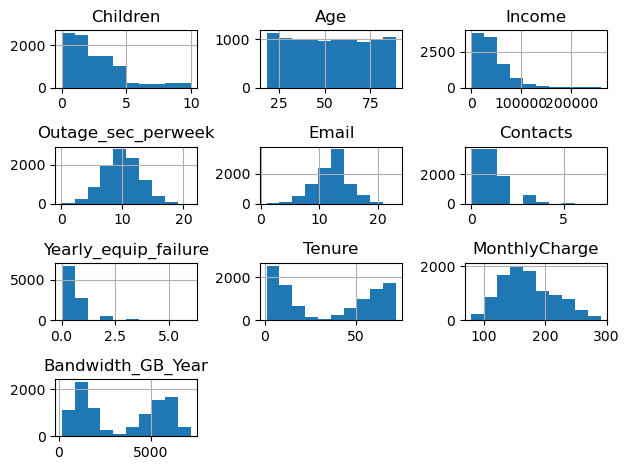

In [49]:
#Create Histograms to view our continuous variables
churn_df[['Children', 
          'Age' , 
          'Income' , 
          'Outage_sec_perweek' , 
          'Email' , 
          'Contacts' , 
          'Yearly_equip_failure' , 
          'Tenure' , 'MonthlyCharge' , 'Bandwidth_GB_Year']].hist()
mpl.savefig('churn_hists.jpg')
mpl.tight_layout()

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


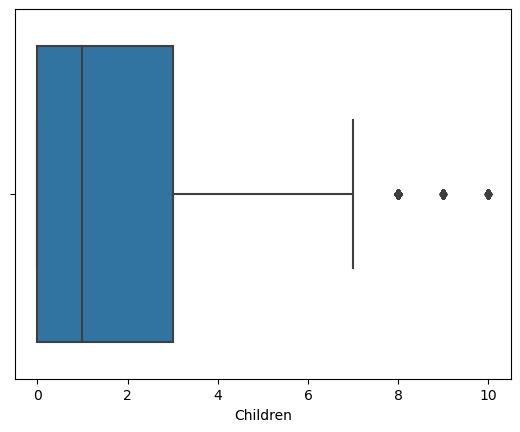

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


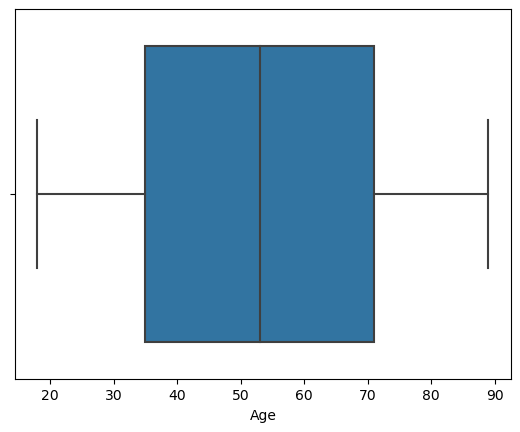

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


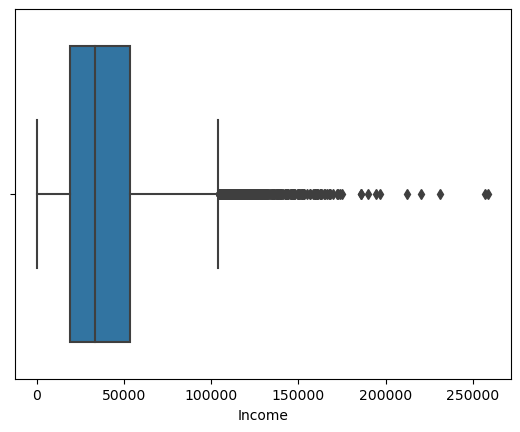

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


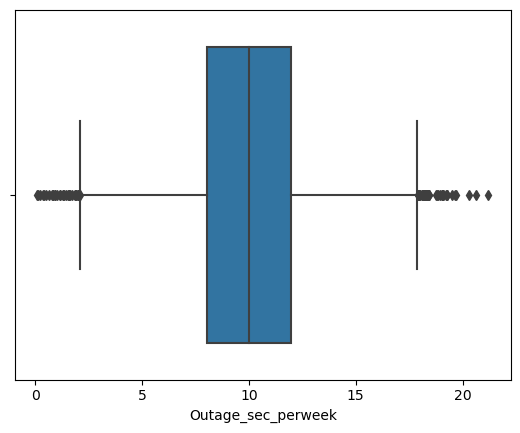

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


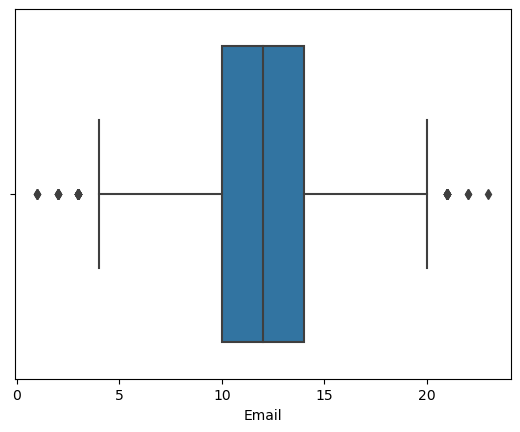

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


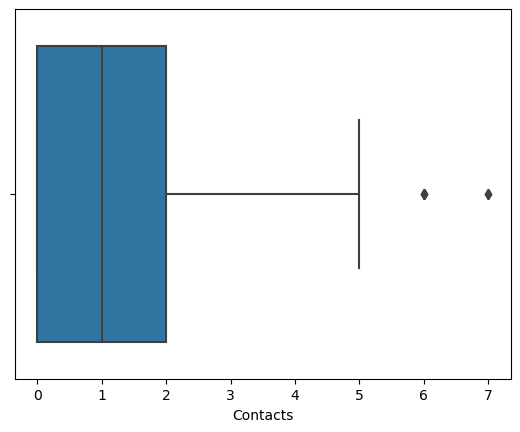

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


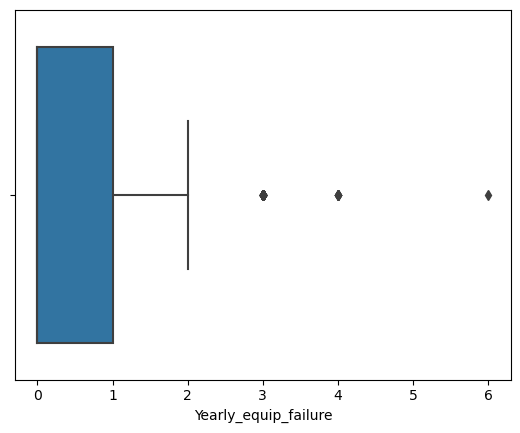

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


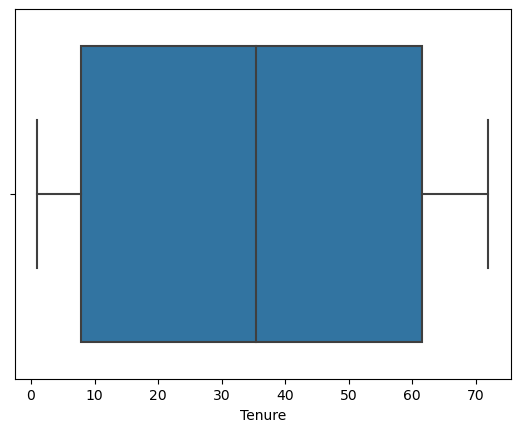

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


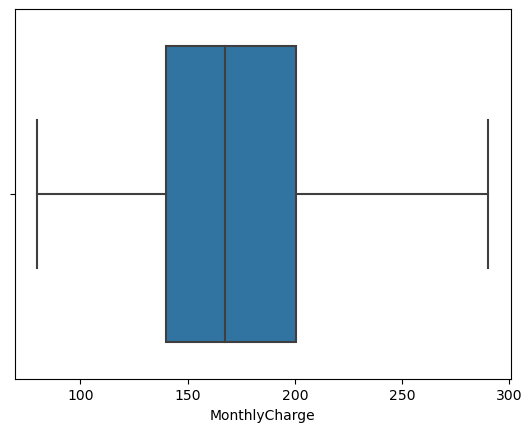

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


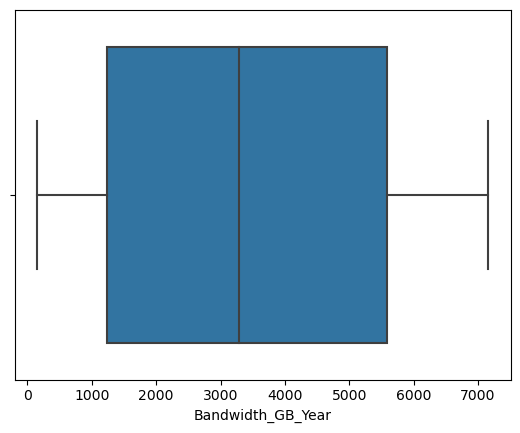

In [50]:
#Create Boxplots for our continuous variables
sb.boxplot('Children' , data = churn_df)
mpl.show()

sb.boxplot('Age' , data = churn_df)
mpl.show()

sb.boxplot('Income' , data = churn_df)
mpl.show()

sb.boxplot('Outage_sec_perweek' , data = churn_df)
mpl.show()

sb.boxplot('Email' , data = churn_df)
mpl.show()

sb.boxplot('Contacts' , data = churn_df)
mpl.show()

sb.boxplot('Yearly_equip_failure' , data = churn_df)
mpl.show()

sb.boxplot('Tenure' , data = churn_df)
mpl.show()

sb.boxplot('MonthlyCharge' , data = churn_df)
mpl.show()

sb.boxplot('Bandwidth_GB_Year' , data = churn_df)
mpl.show()

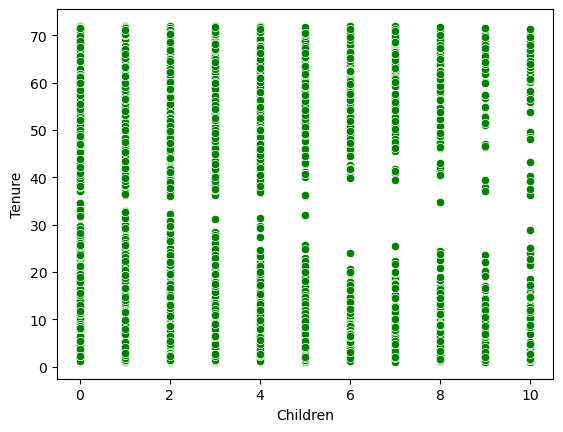

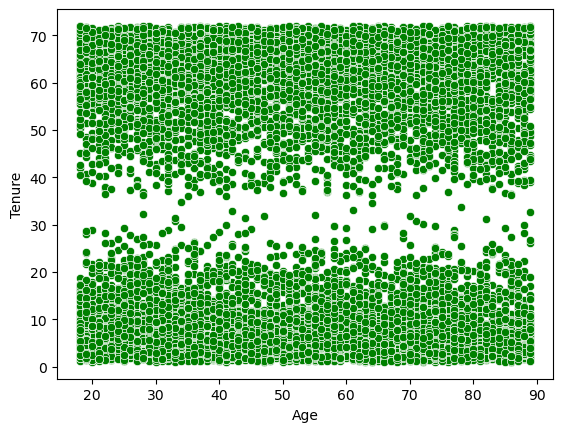

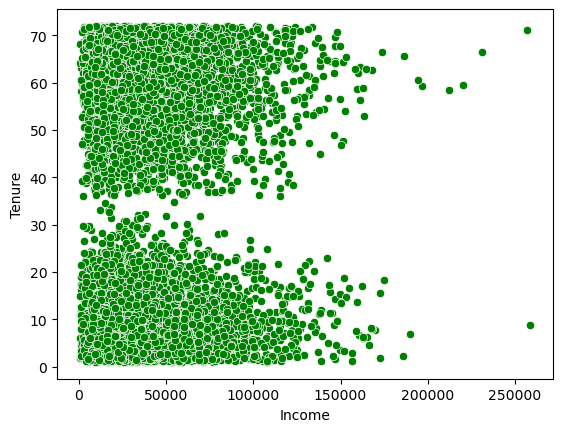

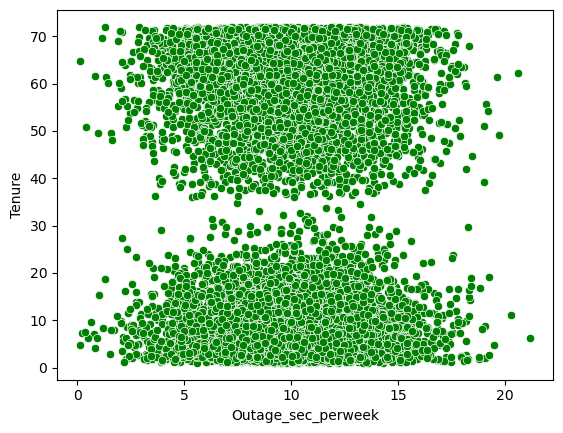

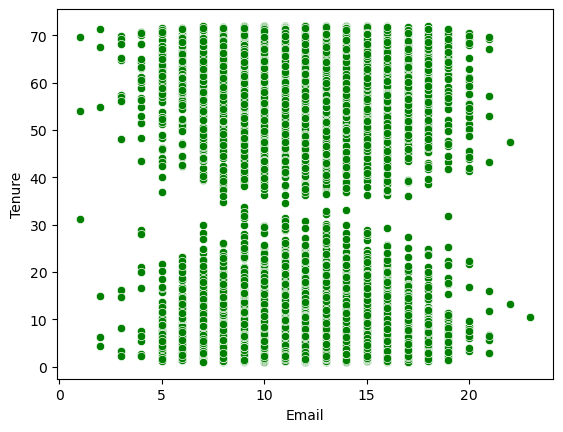

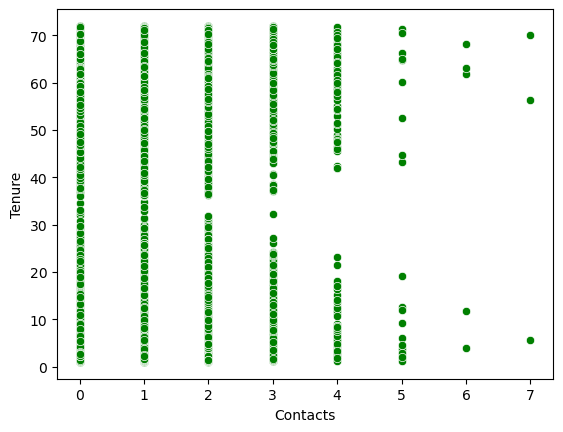

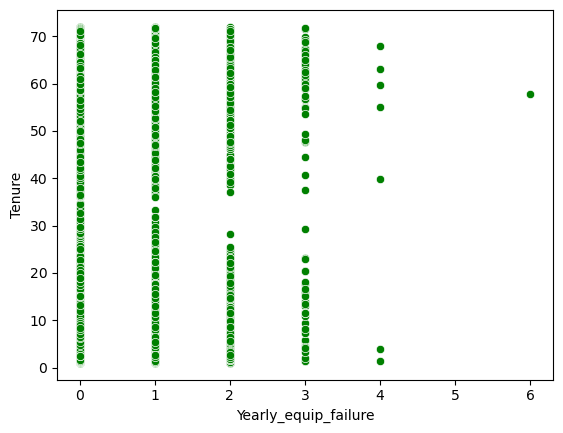

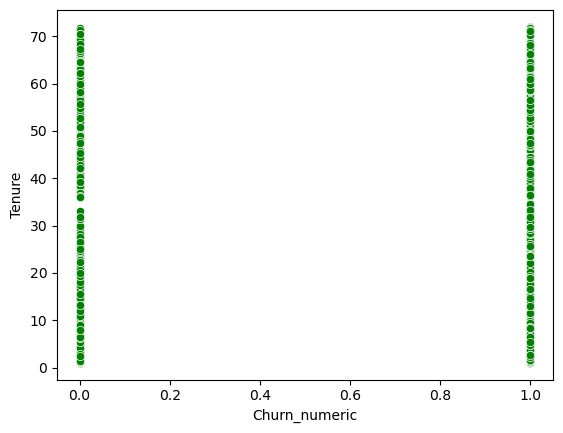

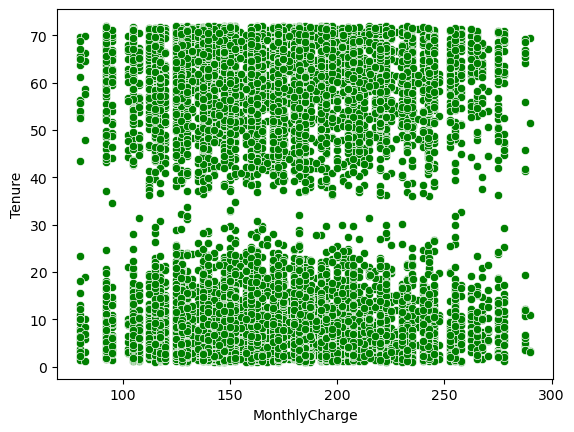

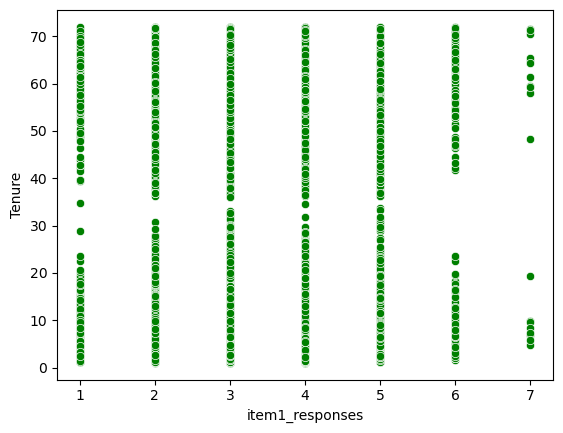

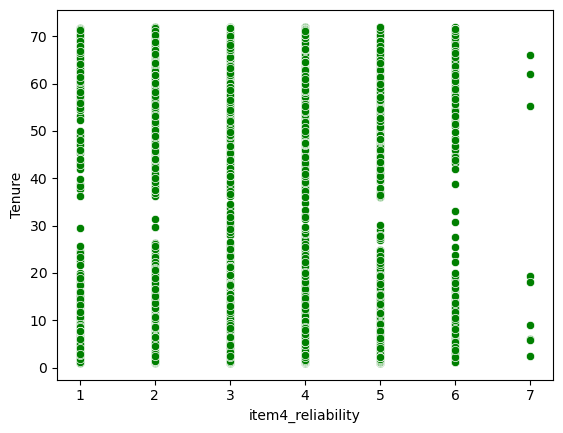

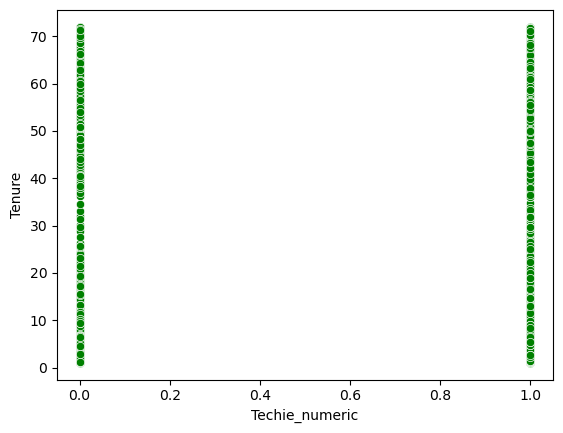

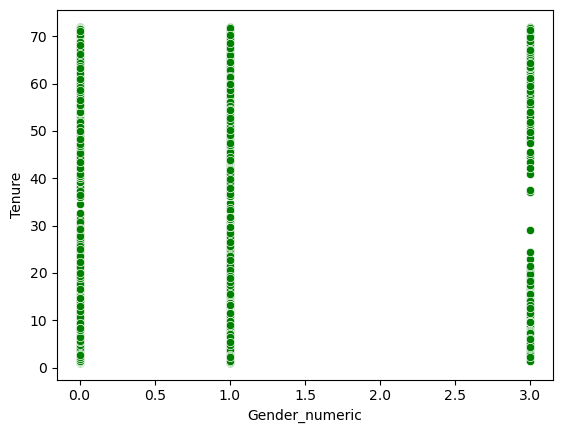

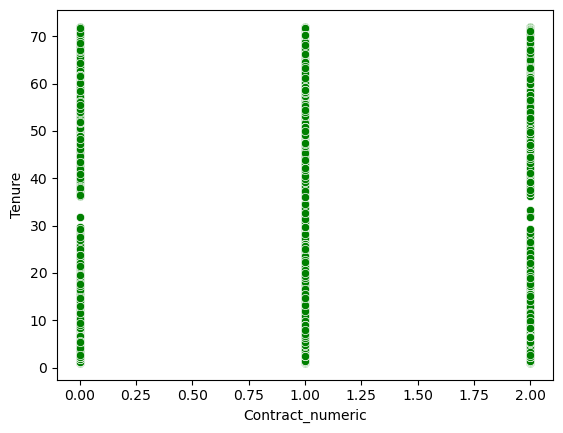

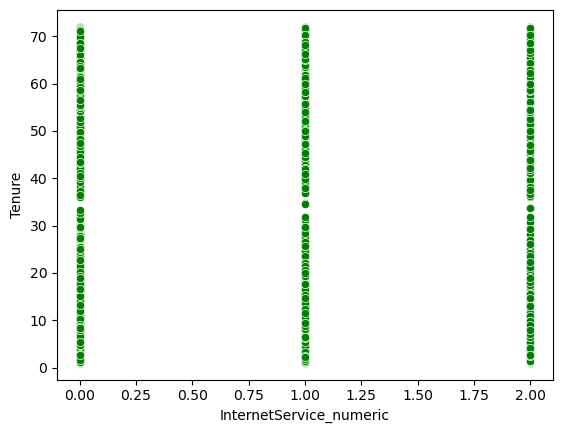

In [51]:
# Run Scatterplots to show direct or inverse relationships between the target & independent variables
sb.scatterplot(x=churn_df['Children'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Age'], y=churn_df['Tenure'],
                color='green')
mpl.show()

sb.scatterplot(x=churn_df['Income'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Email'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Contacts'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Yearly_equip_failure'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Churn_numeric'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['item1_responses'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['item4_reliability'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Techie_numeric'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Gender_numeric'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['Contract_numeric'], y=churn_df['Tenure'],
                color='green')
mpl.show()


sb.scatterplot(x=churn_df['InternetService_numeric'], y=churn_df['Tenure'],
                color='green')
mpl.show()

In [52]:
# Create initial estimated regression equation that could be used to predict Tenure, given the continuous and categorical variables
LMR_Tenure = ols("Tenure ~ Children + Age + Income + Outage_sec_perweek + Email + Contacts + Yearly_equip_failure + Bandwidth_GB_Year + MonthlyCharge + item1_responses + item2_fixes + item3_replacements + item4_reliability + item5_options + item6_respectfulness + item7_courteous + item8_listening +  Churn_numeric + Techie_numeric + Port_modem_numeric + Tablet_numeric + Phone_numeric + Multiple_numeric + OnlineSecurity_numeric + OnlineBackup_numeric + DeviceProtection_numeric + TechSupport_numeric + StreamingTV_numeric + StreamingMovies_numeric + PaperlessBilling_numeric + InternetService_numeric + Contract_numeric + Gender_numeric", data=churn_df).fit()
print(LMR_Tenure.params)
print(LMR_Tenure.summary())

Intercept                  -17.523751
Children                    -0.366423
Age                          0.040279
Income                      -0.000001
Outage_sec_perweek           0.009168
Email                        0.000752
Contacts                    -0.023848
Yearly_equip_failure        -0.027181
Bandwidth_GB_Year            0.011966
MonthlyCharge                0.018156
item1_responses              0.057365
item2_fixes                 -0.054017
item3_replacements           0.024902
item4_reliability           -0.009846
item5_options               -0.038197
item6_respectfulness        -0.014343
item7_courteous             -0.005482
item8_listening             -0.053401
Churn_numeric                1.347461
Techie_numeric              -0.053166
Port_modem_numeric          -0.043823
Tablet_numeric               0.004083
Phone_numeric               -0.014566
Multiple_numeric             1.380790
OnlineSecurity_numeric       0.998428
OnlineBackup_numeric         1.460700
DeviceProtec

In [53]:
#Stepwise Backwards reduction with a P value cutoff of p > .05 from the regression models and p values in the output above ^
#After removing all variables with a P value > .05, we are left with the following variables:
#'Tenure', 'Children', 'Age','Bandwidth_GB_Year', 'item8_listening', 'Churn_numeric', 'Multiple_numeric', 'OnlineBackup_numeric', 'OnlineSecurity_numeric', 'DeviceProtection_numeric', 'TechSupport_numeric', 'InternetService_numeric', 'Gender_numeric'

In [54]:
#Now we will use Variance Inflation Factor (VIF) to reduce our model. For the output, any VIF above 3 should be removed from the model due to an unreliable p score. Usually, it is anything above 5 with room for interpretation, but we need a stricter cutoff, so 3 was chosen.
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Tenure ~ Children + Age + Income + Outage_sec_perweek + Email + Contacts + Yearly_equip_failure + Bandwidth_GB_Year + MonthlyCharge + item1_responses + item2_fixes + item3_replacements + item4_reliability + item5_options + item6_respectfulness + item7_courteous + item8_listening +  Churn_numeric + Techie_numeric + Port_modem_numeric + Tablet_numeric + Phone_numeric + Multiple_numeric + OnlineSecurity_numeric + OnlineBackup_numeric + DeviceProtection_numeric + TechSupport_numeric + StreamingTV_numeric + StreamingMovies_numeric + PaperlessBilling_numeric + InternetService_numeric + Contract_numeric + Gender_numeric', data = churn_df, return_type='dataframe')

#calculate VIF for each explanatory variable
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['variable'] = X.columns

#view VIF for each explanatory variable 
VIF

,VIF,variable
0,1129.060742,Intercept
1,1.003919,Children
2,1.003478,Age
3,1.003404,Income
4,1.003788,Outage_sec_perweek
5,1.003559,Email
6,1.003144,Contacts
7,1.002883,Yearly_equip_failure
8,1.380259,Bandwidth_GB_Year
9,23.310180,MonthlyCharge


In [55]:
# Evcerything above 3 VIF was removed to have a very strict cutoff, Including Multiple_numeric, StreamingTV_numeric, StreamingMovies_numeric, InternetService_numeric

Intercept                  -10.863561
Children                    -0.356664
Age                          0.039634
Bandwidth_GB_Year            0.011727
item8_listening             -0.047615
Churn_numeric                3.344532
OnlineBackup_numeric         0.897706
OnlineSecurity_numeric       0.961640
DeviceProtection_numeric     0.901045
Gender_numeric               0.596107
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 9.809e+04
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:41:12   Log-Likelihood:                -24475.
No. Observations:               10000   AIC:                         4.897e+04
Df Residuals:                    9990   BIC:        

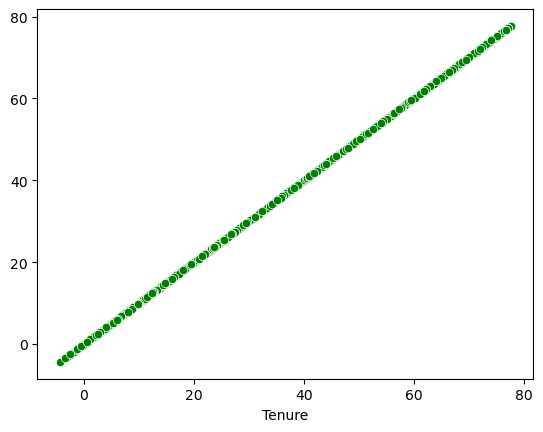

In [56]:
# Create reduced OLS multiple regression using the ols feature. We are compiling our final regression using the variables from the RFE
LM_Reduced_Tenure = ols("Tenure ~ Children + Age + Bandwidth_GB_Year + item8_listening + Churn_numeric + OnlineBackup_numeric + OnlineSecurity_numeric + DeviceProtection_numeric + Gender_numeric", data=churn_df).fit()
print(LM_Reduced_Tenure.params)
print(LM_Reduced_Tenure.summary())

# Extract Clean dataset
churn_df.to_csv('churn_Task1.csv')

Residuals = churn_df['Tenure'] = LM_Reduced_Tenure.predict(churn_df[['Tenure', 'Children', 'Age','Bandwidth_GB_Year', 'item8_listening', 'Churn_numeric', 'OnlineBackup_numeric', 'OnlineSecurity_numeric', 'DeviceProtection_numeric', 'Gender_numeric']])
sb.scatterplot(x=churn_df['Tenure'],y=Residuals,color='green')
mpl.show()

In [57]:
# Here we are calculating our residual error from the reduced model

print(np.sqrt(LM_Reduced_Tenure.mse_resid))


2.798474402739518
